In [250]:
import pandas as pd
from datetime import datetime

In [251]:
offline = pd.read_csv('../test_csv/오프라인.csv', encoding='cp949')

In [252]:
offline.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [253]:
offline.rename(
    columns={
        'crym' : '기준년월'
    }
)

,기준년월,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6.283353e+09
2644,202109,편의점,2,60,243768,1.997442e+09
2645,202109,편의점,2,70,40523,3.524203e+08
2646,202109,편의점,2,80,6349,5.333488e+07


In [254]:
offline.columns = ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [255]:
offline.head()

,기준년월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7.600000e+03
1,201901,백화점,1,10,379,1.945872e+07
2,201901,백화점,1,20,45173,4.747711e+09
3,201901,백화점,1,30,271858,2.791826e+10
4,201901,백화점,1,40,391109,3.791149e+10


In [256]:
offline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기준년월    2648 non-null   int64  
 1   업종      2648 non-null   object 
 2   성별      2648 non-null   int64  
 3   연령대     2648 non-null   int64  
 4   총이용건수   2648 non-null   int64  
 5   총이용금액   2648 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 124.3+ KB


In [257]:
offline.isna().sum()

기준년월     0
업종       0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [258]:
offline.loc[offline['성별'] == '-', :]

,기준년월,업종,성별,연령대,총이용건수,총이용금액


In [259]:
offline['성별'].isin(['-']).sum()

0

In [260]:
offline['성별'].value_counts()

성별
2    1336
1    1312
Name: count, dtype: int64

In [261]:
offline['기준년월'] = pd.to_datetime(offline['기준년월'], format='%Y%m')

In [262]:
# offline['기준년월'].map(
#     lambda x : datetime.strptime(str(x), '%Y%m')
# )

In [263]:
for idx in range(len(offline)):
    offline.loc[idx, '기준년'] = datetime.strftime(offline.loc[idx, '기준년월'], '%Y')

In [264]:
offline['기준년월'].map(
    lambda x : x.strftime('%Y')
)
offline['기준년월'].dt.strftime('%Y')
offline['기준년월'].dt.year

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2643    2021
2644    2021
2645    2021
2646    2021
2647    2021
Name: 기준년월, Length: 2648, dtype: int32

In [265]:
offline['건당이용금액'] = offline['총이용금액'] / offline['총이용건수']

In [266]:
offline[['성별', '기준년', '건당이용금액']].groupby(['성별', '기준년']).mean()

건당이용금액
성별 기준년               
1  2019  39184.349662
   2020  44009.589591
   2021  46948.320084
2  2019  38107.838544
   2020  41389.763130
   2021  43306.318972

In [267]:
offline.pivot_table(
    index = ['성별', '기준년'],
    values = '총이용금액',
    aggfunc = 'sum'
)

총이용금액
성별 기준년               
1  2019  3.542740e+12
   2020  3.476297e+12
   2021  2.643688e+12
2  2019  7.210066e+12
   2020  6.485446e+12
   2021  4.840621e+12

In [268]:
offline.pivot_table(
    index = '성별',
    columns = '기준년',
    values = '총이용금액',
    aggfunc = 'sum'
)

기준년,2019,2020,2021
성별,,,
1,3.542740e+12,3.476297e+12,2.643688e+12
2,7.210066e+12,6.485446e+12,4.840621e+12


In [269]:
offline[['성별', '기준년', '총이용금액']].groupby(['성별', '기준년']).mean().unstack()

총이용금액                            
기준년          2019          2020          2021
성별                                           
1    7.458400e+09  7.287835e+09  7.343577e+09
2    1.456579e+10  1.348326e+10  1.344617e+10

In [270]:
import matplotlib.pyplot as plt
import platform

In [271]:
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

<Axes: xlabel='기준년월'>

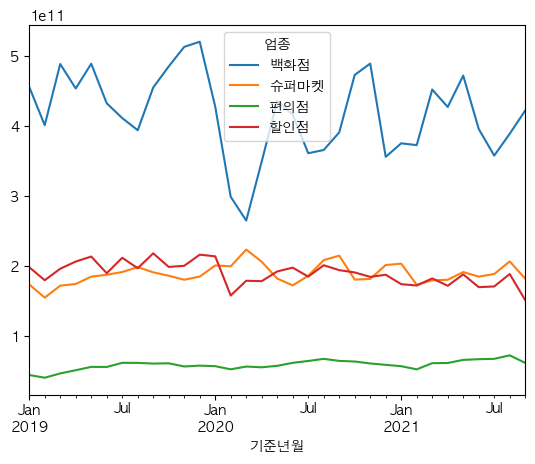

In [272]:
group_data = offline.groupby(['기준년월', '업종'])['총이용금액'].sum()
group_data.unstack().plot()

In [273]:
online = pd.read_csv('../test_csv/온라인.csv', encoding='cp949')

In [274]:
online

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337
...,...,...,...,...,...
646,202109,2,50,3237324,181360535814
647,202109,2,60,1019719,70026626874
648,202109,2,70,159261,13091029631
649,202109,2,80,20094,1935122483


In [275]:
online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [276]:
online['기준년월'] = pd.to_datetime(online['기준년월'], format='%Y%m')

In [277]:
offline = offline.drop(['기준년', '건당이용금액'], axis=1)

In [278]:
online.isna().sum()

기준년월     0
성별       0
연령대      0
총이용건수    0
총이용금액    0
dtype: int64

In [279]:
revenue = pd.concat([online, offline], ignore_index=True)

In [280]:
revenue

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,2019-01-01,1,1,1,1.106850e+05,NaN
1,2019-01-01,1,10,2333,9.810822e+07,NaN
2,2019-01-01,1,20,272915,1.385408e+10,NaN
3,2019-01-01,1,30,1320227,8.294613e+10,NaN
4,2019-01-01,1,40,1372052,9.555085e+10,NaN
...,...,...,...,...,...,...
3294,2021-09-01,2,50,844081,6.283353e+09,편의점
3295,2021-09-01,2,60,243768,1.997442e+09,편의점
3296,2021-09-01,2,70,40523,3.524203e+08,편의점
3297,2021-09-01,2,80,6349,5.333488e+07,편의점


In [281]:
flag = revenue['업종'].isna()
revenue.loc[flag, '업종'] = '온라인'

In [283]:
revenue['업종'].map(
    lambda x : '온라인' if pd.isna(x) else x
)

0       온라인
1       온라인
2       온라인
3       온라인
4       온라인
       ... 
3294    편의점
3295    편의점
3296    편의점
3297    편의점
3298    편의점
Name: 업종, Length: 3299, dtype: object

In [284]:
revenue['연령대'].value_counts()

연령대
10    330
20    330
30    330
40    330
50    330
60    330
70    330
80    330
90    330
0     284
1      45
Name: count, dtype: int64

In [286]:
df2 = revenue.loc[revenue['연령대'] != 0]

In [289]:
group_data2 = df2.groupby(['기준년월', '업종'])['총이용금액'].sum()

<Axes: xlabel='기준년월'>

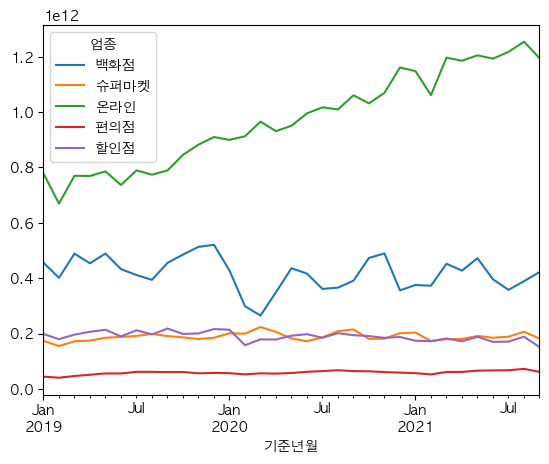

In [291]:
group_data2.unstack().plot()

In [293]:
df3 = df2.copy()

In [294]:
df3['업종'] = df2['업종'].map(
    lambda x : '오프라인' if x != '온라인' else x
)

<Axes: xlabel='기준년월'>

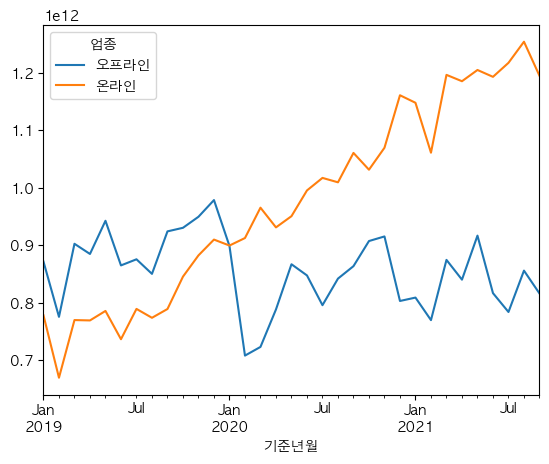

In [296]:
df3.groupby(['기준년월', '업종'])['총이용금액'].sum().unstack().plot()